In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Question A implementation of hadamard matrices

def KronProd(A,B):
    prod=np.kron(A,B)
    return prod

def createHadamardRecursive(n):
    #stopping cond
    if n==1:
        return (1/np.sqrt(2))*np.array([[1,1],[1,-1]])
    return KronProd(createHadamardRecursive(1),createHadamardRecursive(n-1))

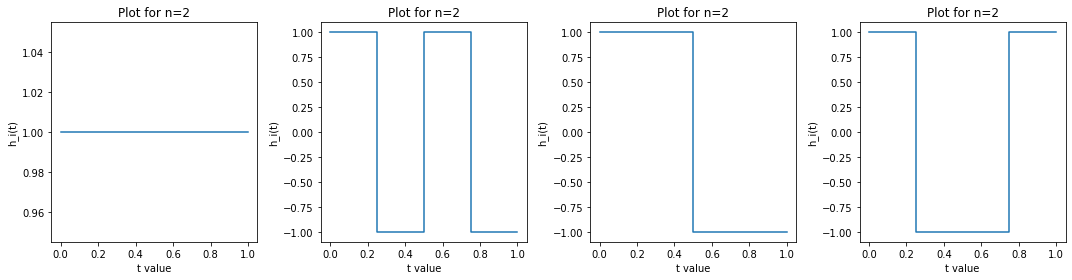

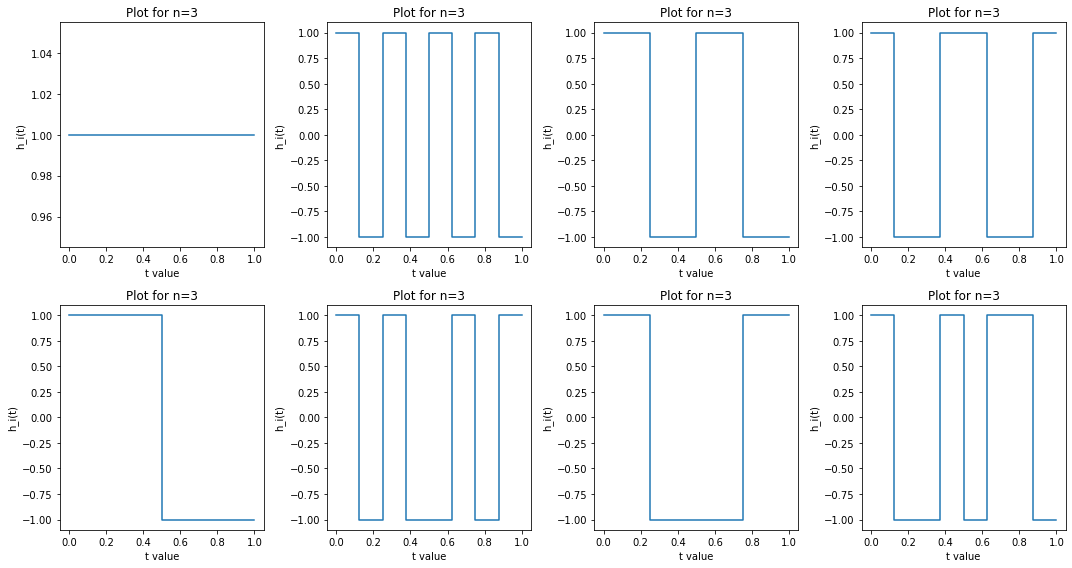

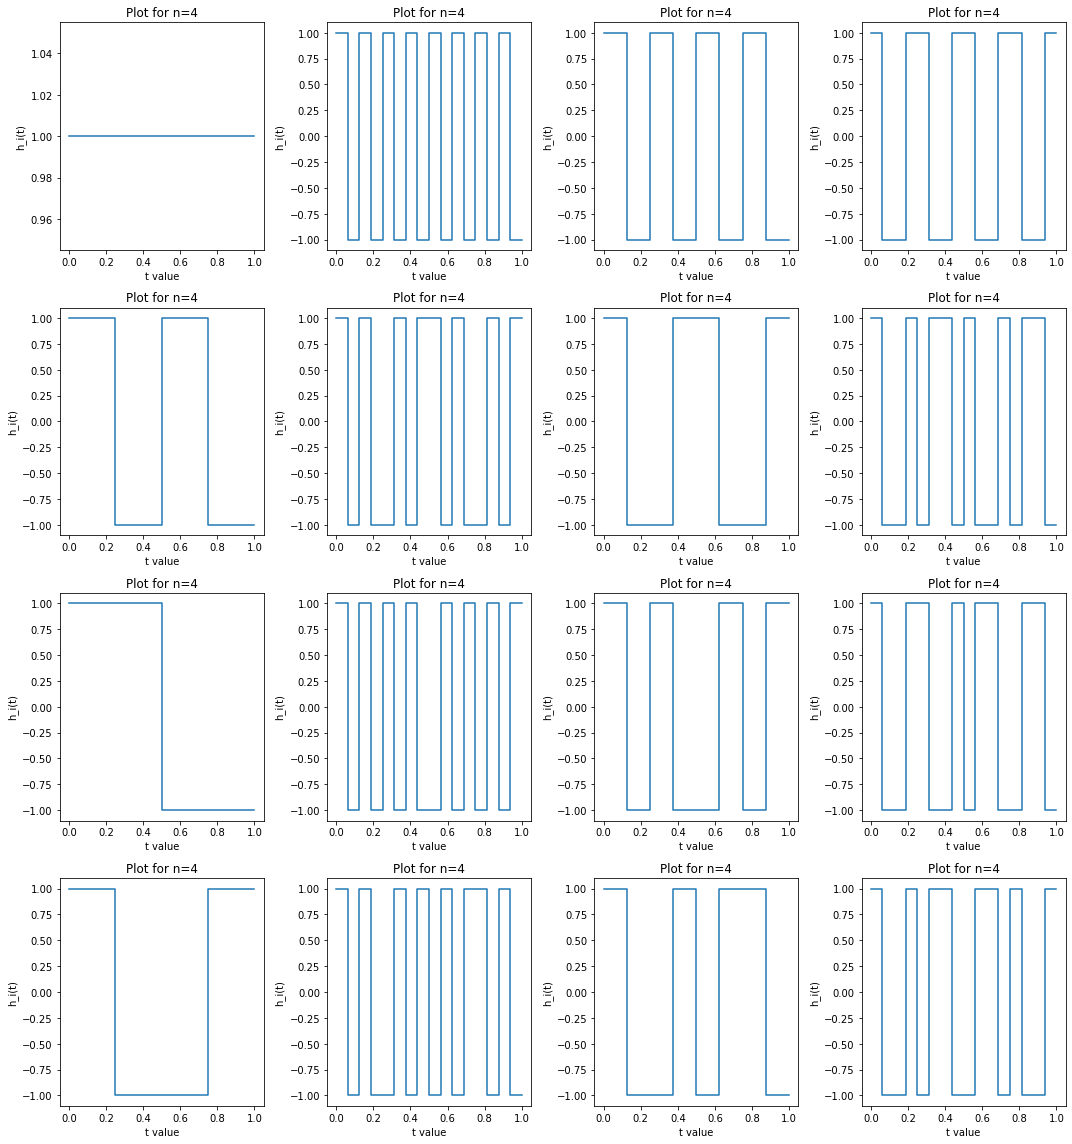

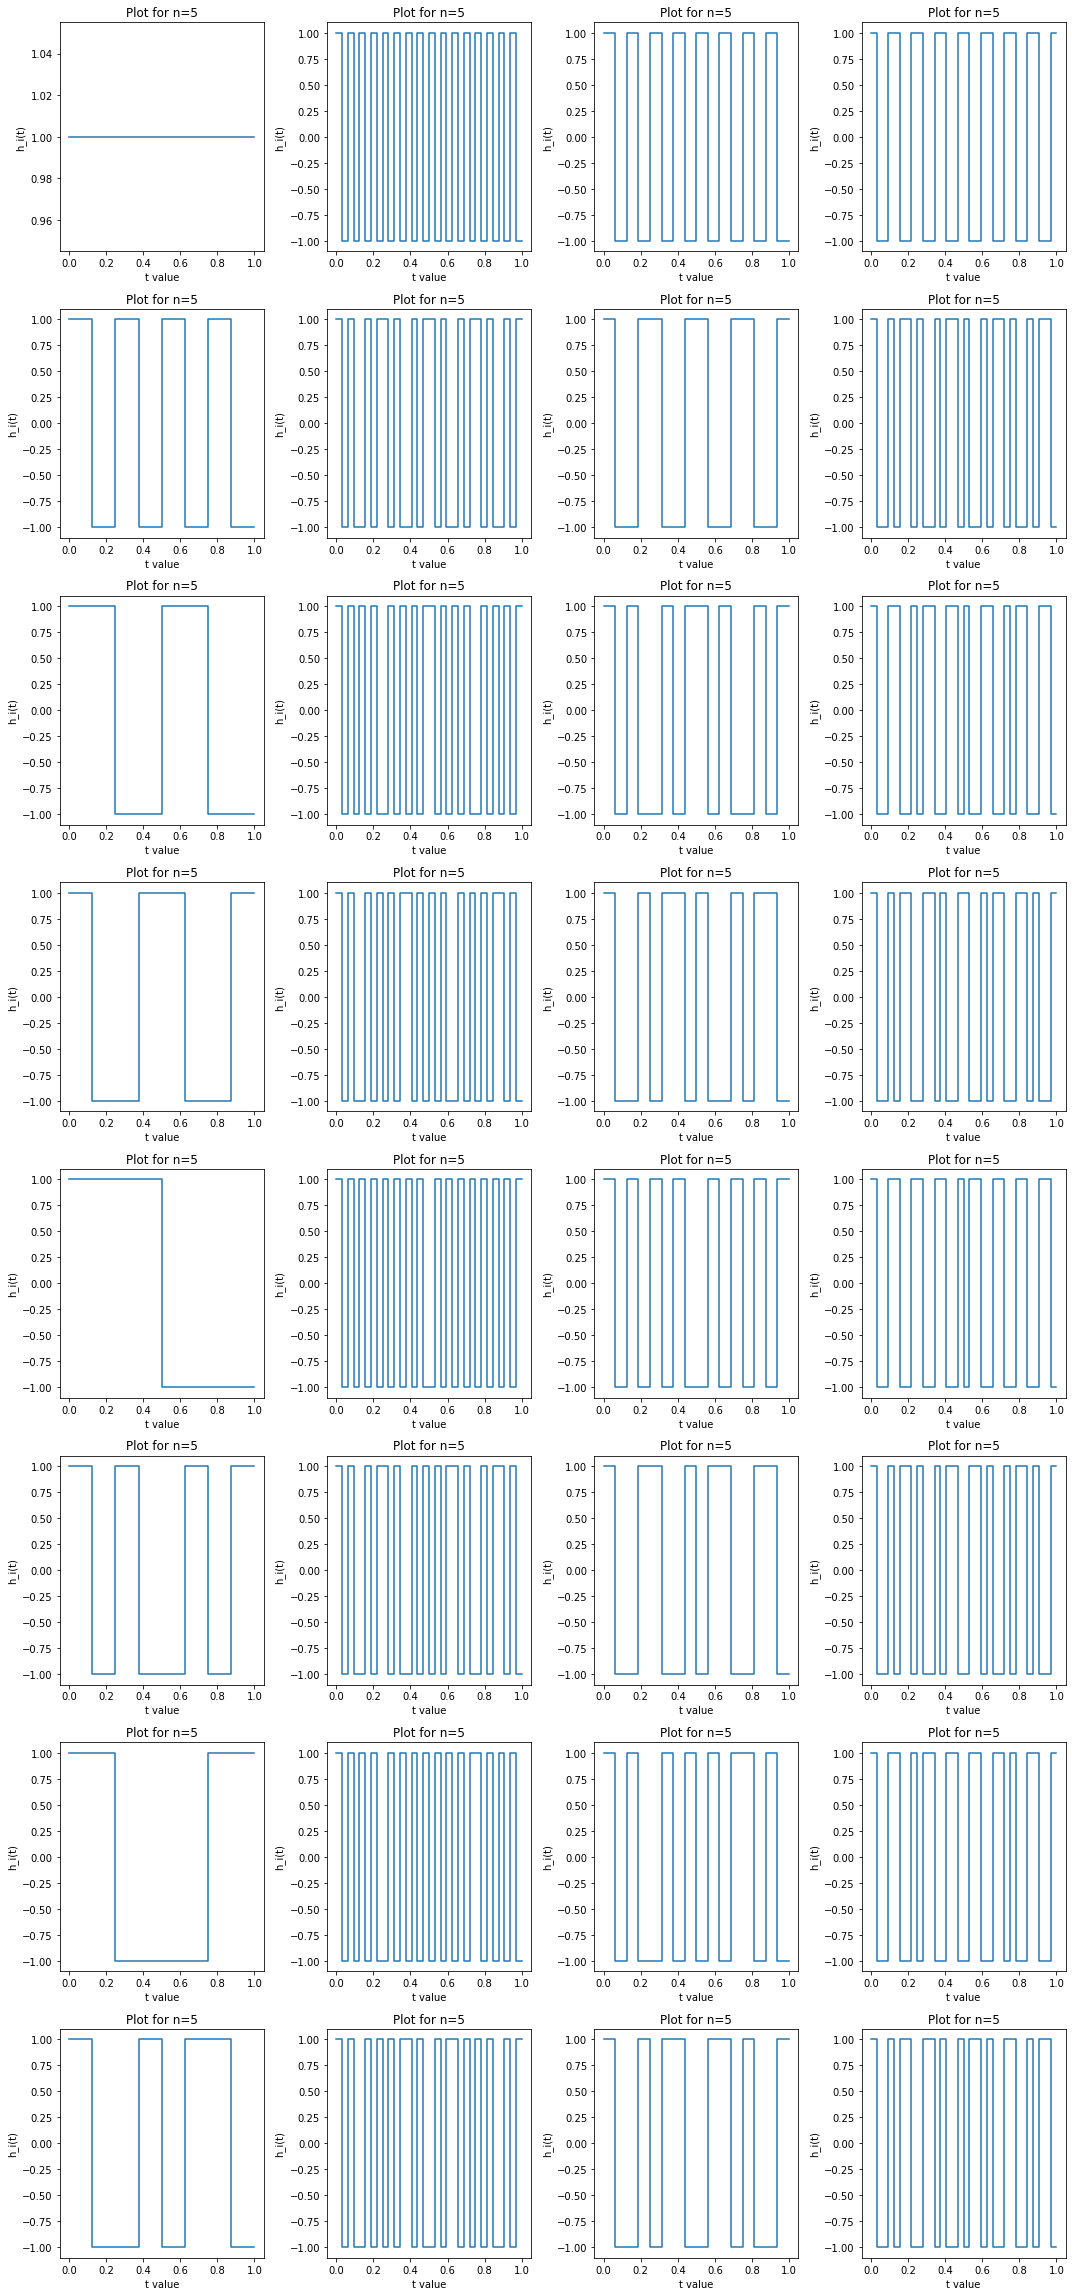

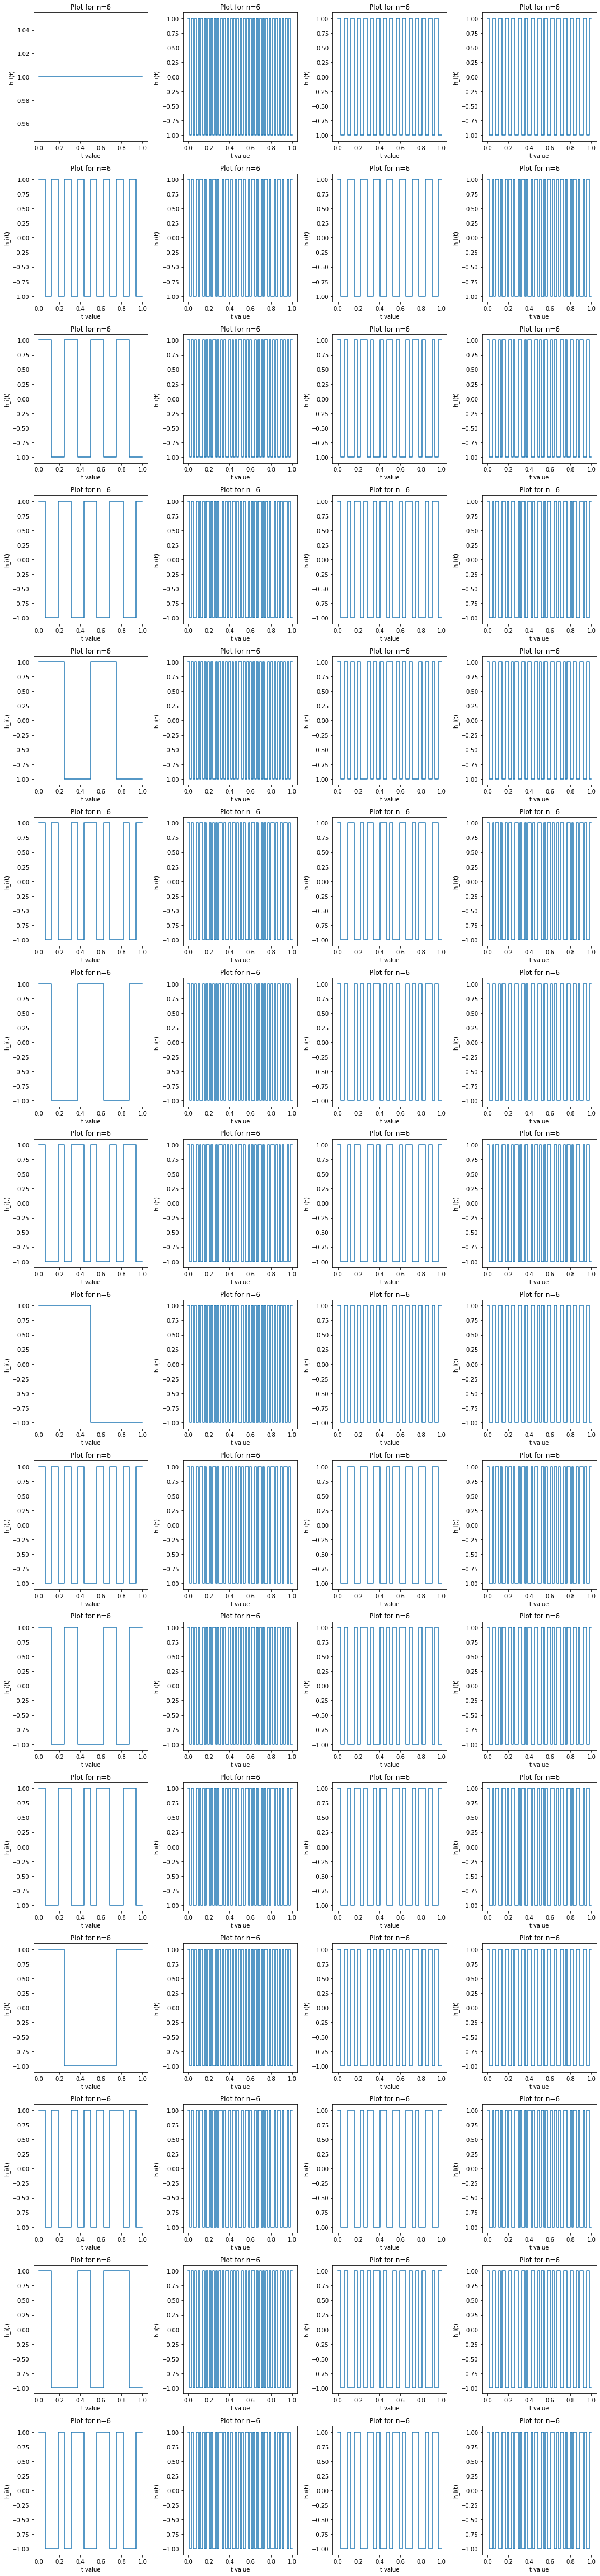

In [ ]:
#Question B - taking the hadamard orthonormal family into a new set of functions h_i

#creating the hadamard basis functions, 
#we'll multiply the transposed H_N matrix with them and get the needed h_i functions
def createStandardBasis(delta_i,n,t):
    N=np.power(2,n)
    #indicator of the interval i
    indicator = (t >= delta_i/N) and (t < (delta_i+1)/N) 
    psi_i=np.sqrt(N)*indicator
    return psi_i

def createMatrixSet(matrix_func):
    matrix_set=[]
    for i in range(2,7):
        matrix_set.append(matrix_func(i))
    return matrix_set

def createH_I(n,i,matrix_func,basis_func):
    N=np.power(2,n)
    matrix_set=createMatrixSet(matrix_func)
    matrix_i=matrix_set[n-2]
    t_values=[]
    h_i_values=[]
    for j in range(N):
        t=j/N
        t_values.append(t)
        h_i_t=0
        for k in range(N):
            h_i_t+=matrix_i[k,i-1]*basis_func(k,n,t)
        h_i_values.append(h_i_t)
    return t_values,h_i_values

def createStandard(n):
    return np.eye(round(2**n))*np.sqrt(2**n)

def createPlots(k,n,matrix_func,basis_func,calculation_func):
    N=np.power(2,n)
    bases=[]
    for i in range(2,7):
        bases.append(np.transpose(matrix_func(i)@createStandard(i)))
    cols=4
    rows=int(np.ceil(2**n/cols))
    plt.figure(figsize=(15,4*rows))
    x=np.arange(start=0,stop=1+1/(2**n),step=1/(2**n))
    for i in range(2**n):
        plt.subplot(rows,cols,i+1)
        y=np.concatenate(([bases[k][i][0]],bases[k][i]))
        plt.step(x, y, where='pre')
        plt.title("Plot for n="+str(n))
        plt.xlabel("t value")
        plt.ylabel("h_i(t)")
        plt.tight_layout()

k=0
for n in range (2,7):
    createPlots(k,n,createHadamardRecursive,createStandardBasis, createH_I)
    k+=1

In [ ]:
#Question C - implement the Walsh Hadamard matrix

def countSigns(matrix_row):
    counter = 0
    prev_sign = matrix_row[0] > 0
    for i in range(1, matrix_row.shape[0]):
        curr_sign = matrix_row[i] > 0
        if (prev_sign != curr_sign):
            counter += 1
        prev_sign = curr_sign
    return counter


def createWalshMatrix(n):
    hadamard_matrix = createHadamardRecursive(n)
    N = np.power(2,n)
    walsh_matrix = np.zeros(hadamard_matrix.shape)
    for i in range(N):
        #we proved in class and in the dry part that each row has an index according to the amount of sign changes
        row_num = countSigns(hadamard_matrix[i,0:N])
        # copying the row from matrix H to matrix WH
        for j in range(N):
            walsh_matrix[row_num,j] = hadamard_matrix[i, j]
    return walsh_matrix

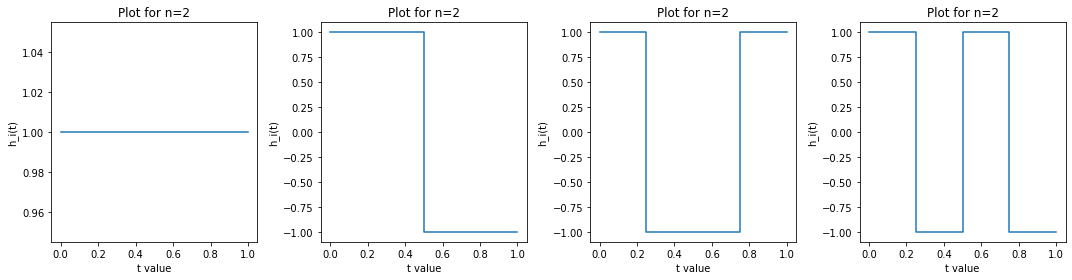

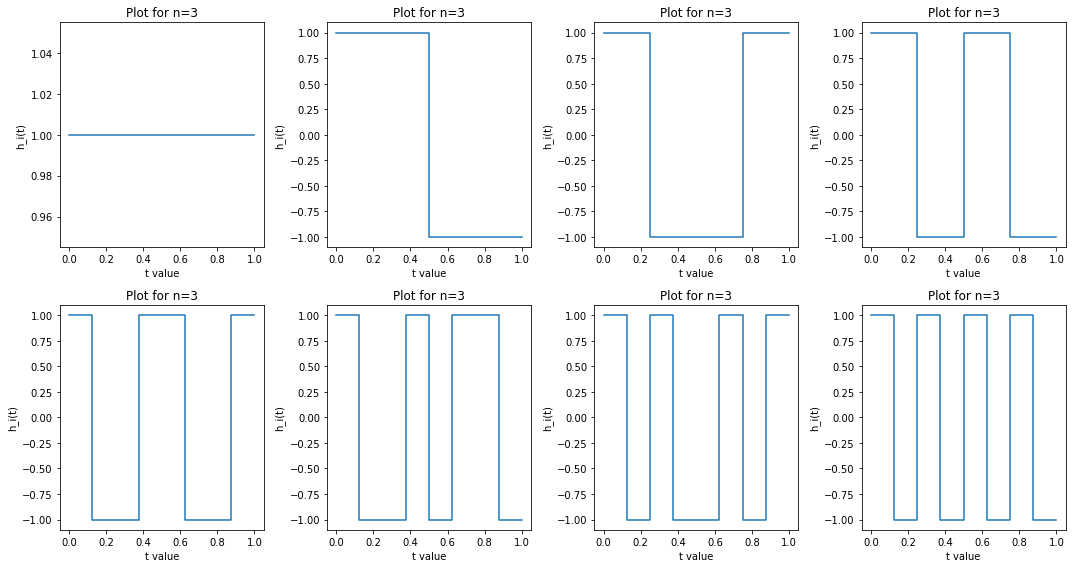

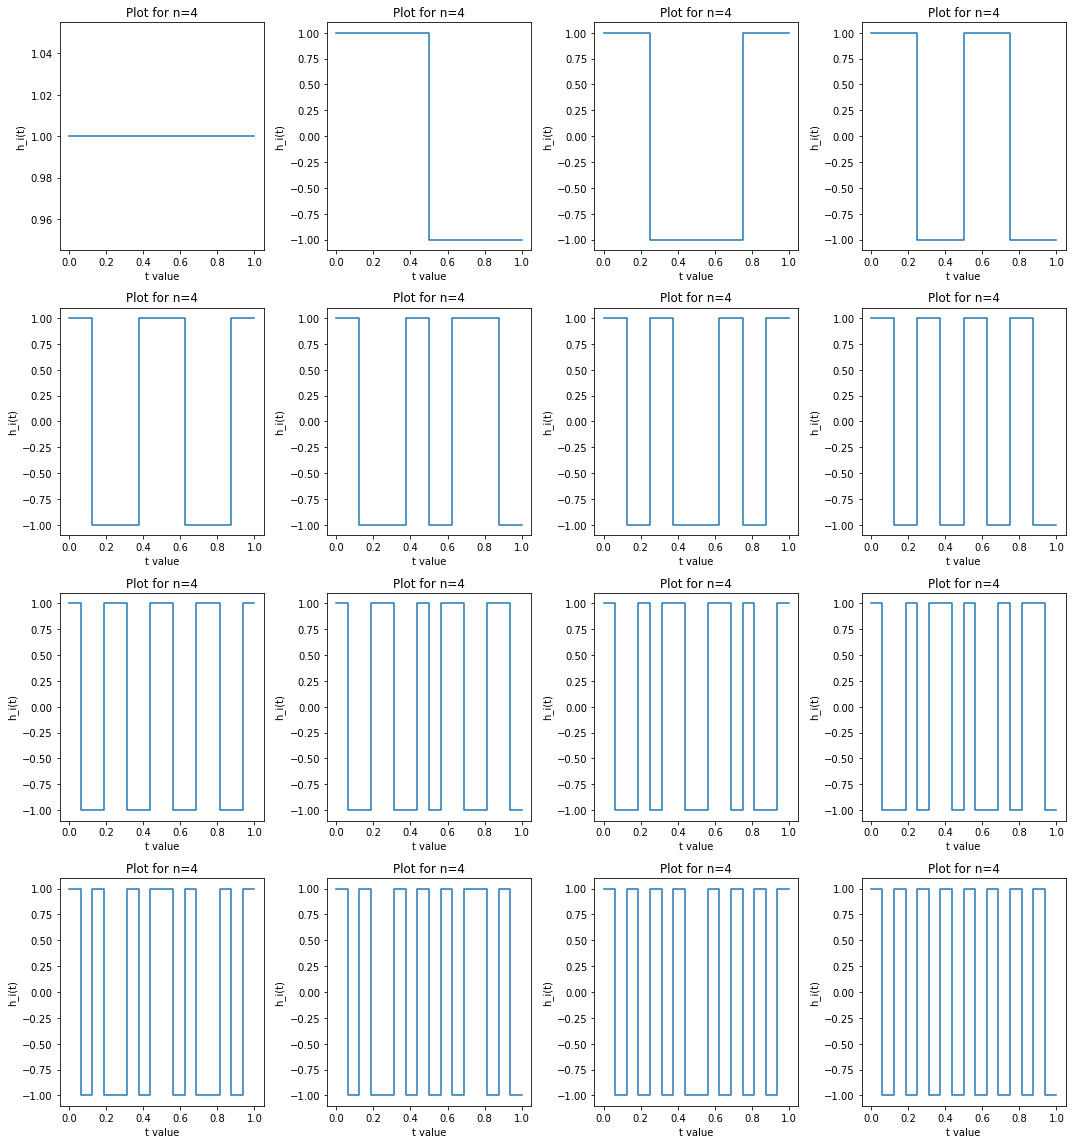

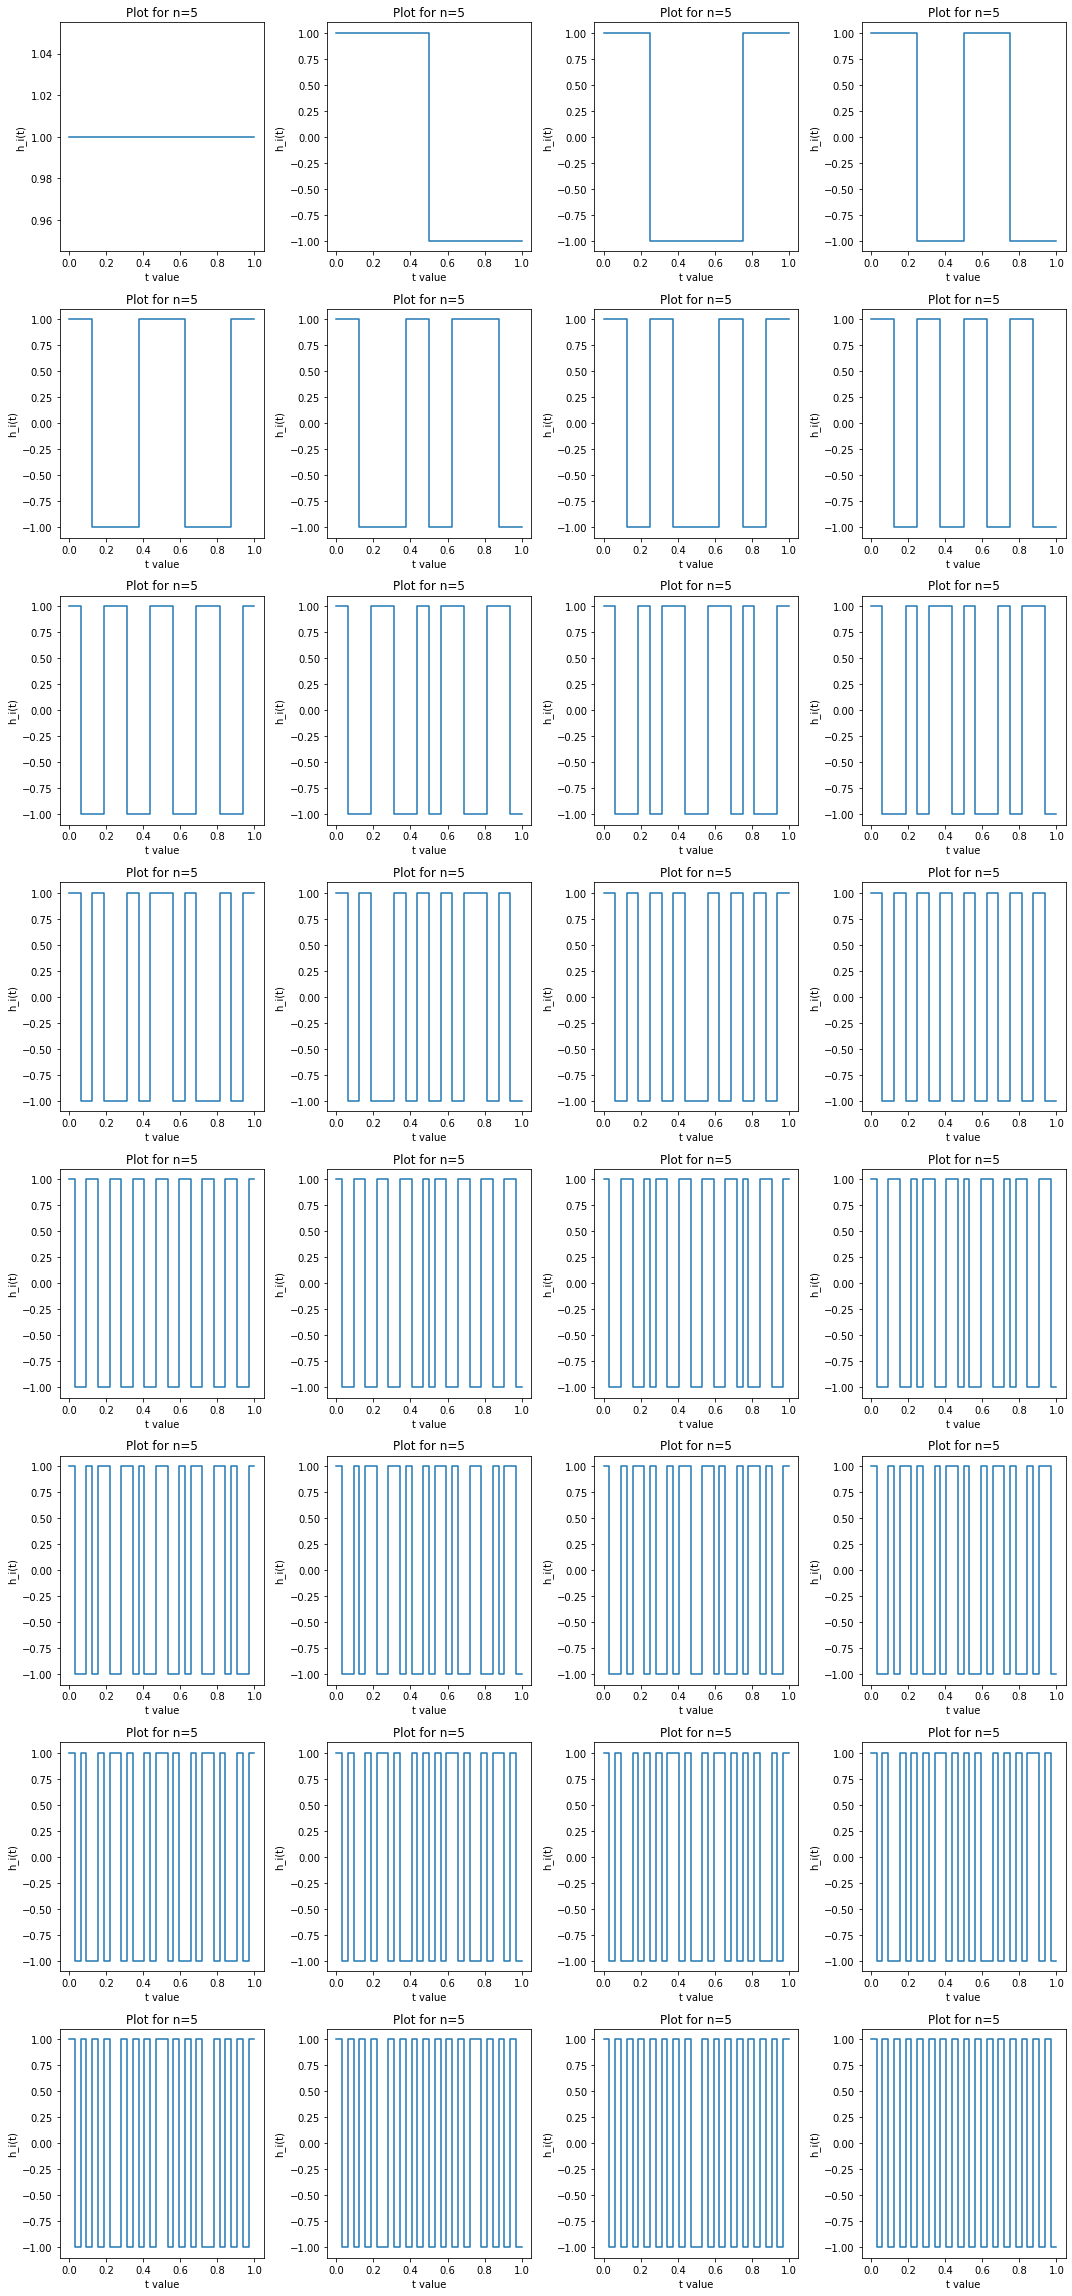

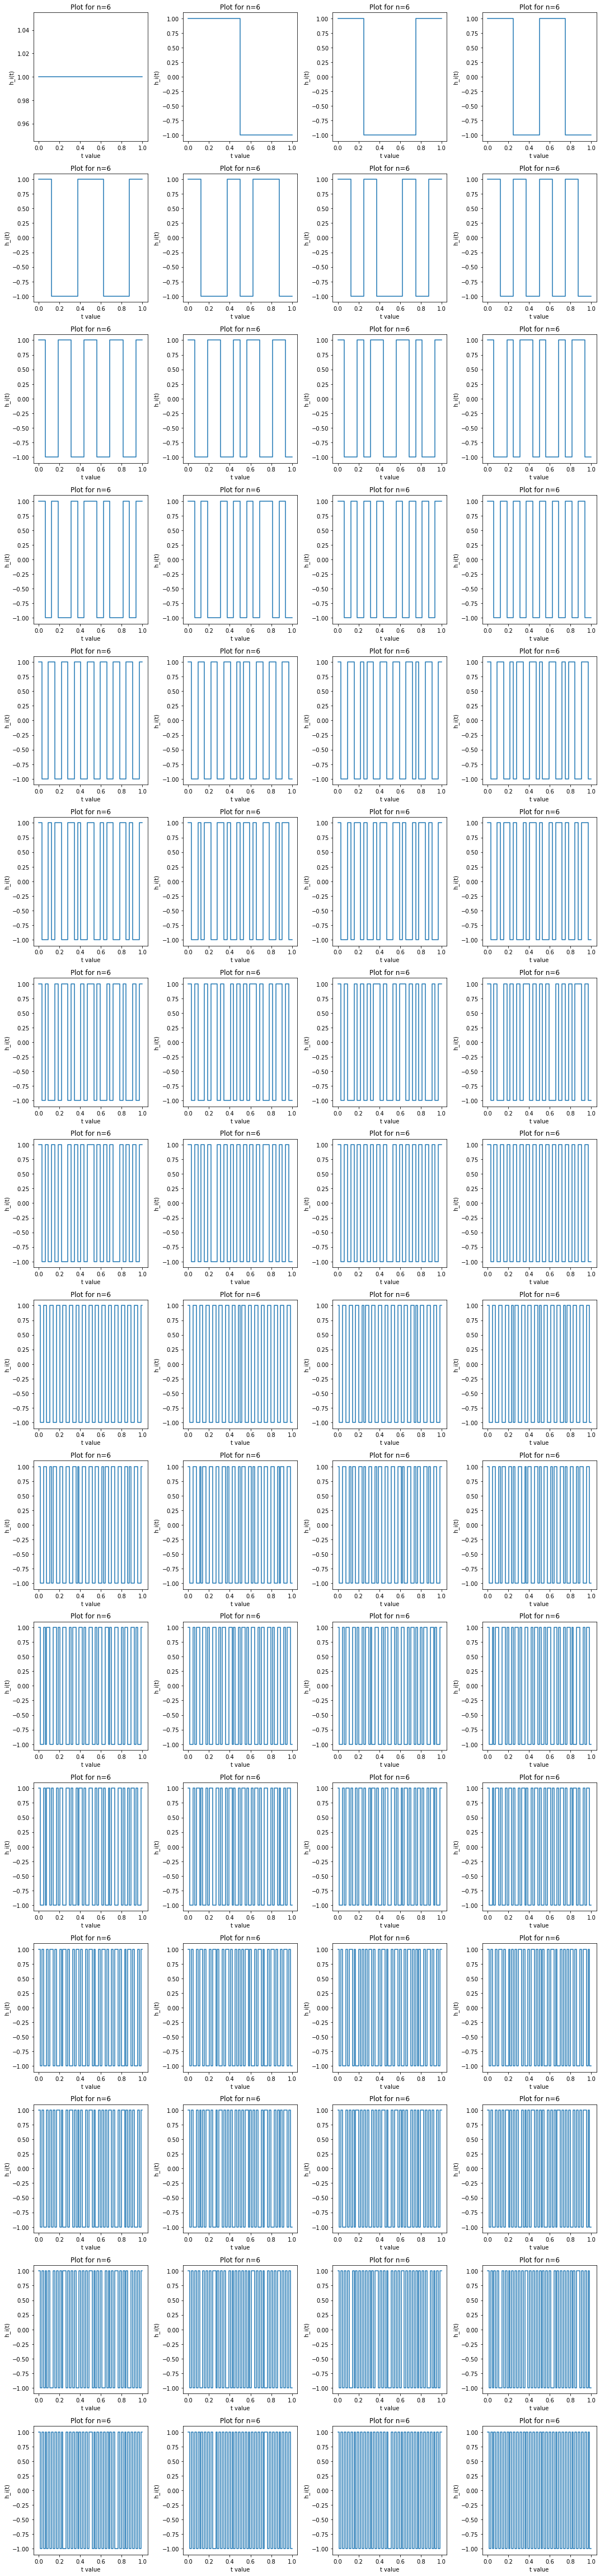

In [ ]:
# plotting the functions
k=0
for n in range (2,7):
    N = np.power(2, n)
    createPlots(k, n,createWalshMatrix,createStandardBasis,createH_I)
    k+=1

In [ ]:
def createHaarMatrix(n):
    if n==1:
        return createHadamardRecursive(n)
    sub_haar=createHaarMatrix(n-1)
    eye=np.eye(2**(n-1))
    left_op=np.zeros((2,1))
    left_op[0,0]=1
    left_op[1,0]=1
    right_op=np.zeros((2,1))
    right_op[0,0]=1
    right_op[1,0]=-1
    left_half=np.kron(sub_haar,left_op)
    right_half=np.kron(eye,right_op)
    res=np.c_[left_half,right_half]
    return res/np.sqrt(2)

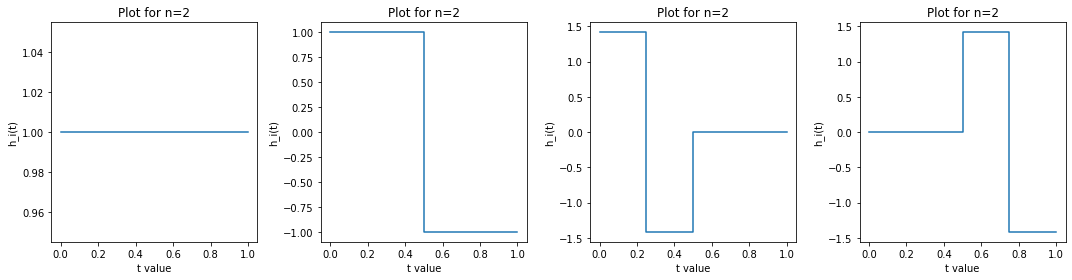

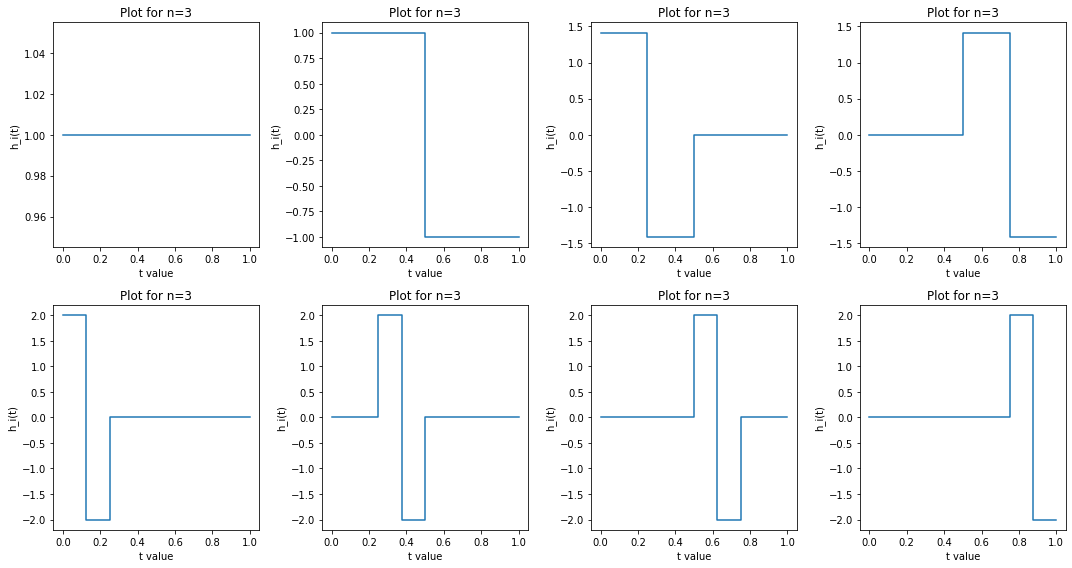

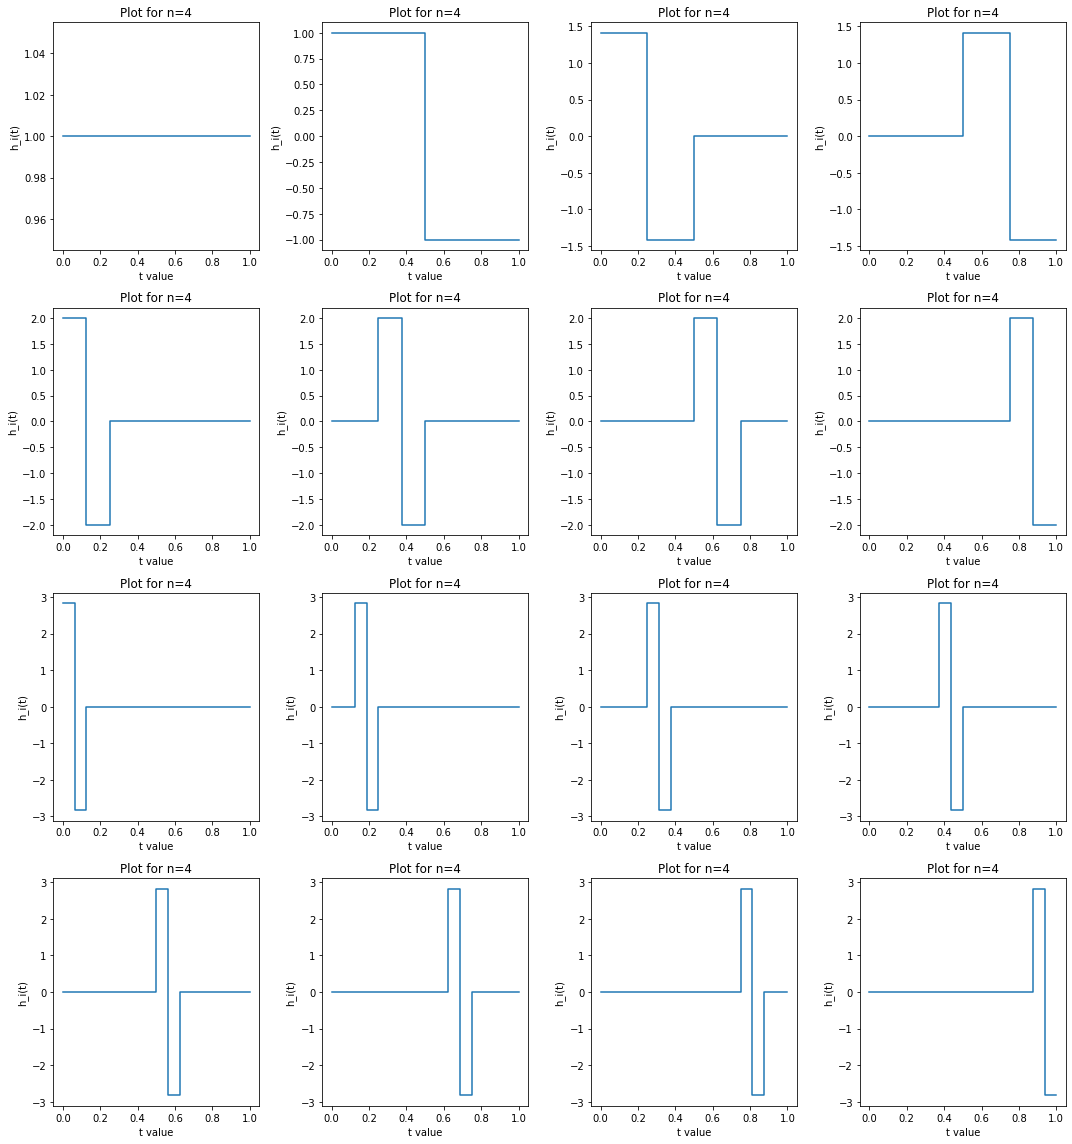

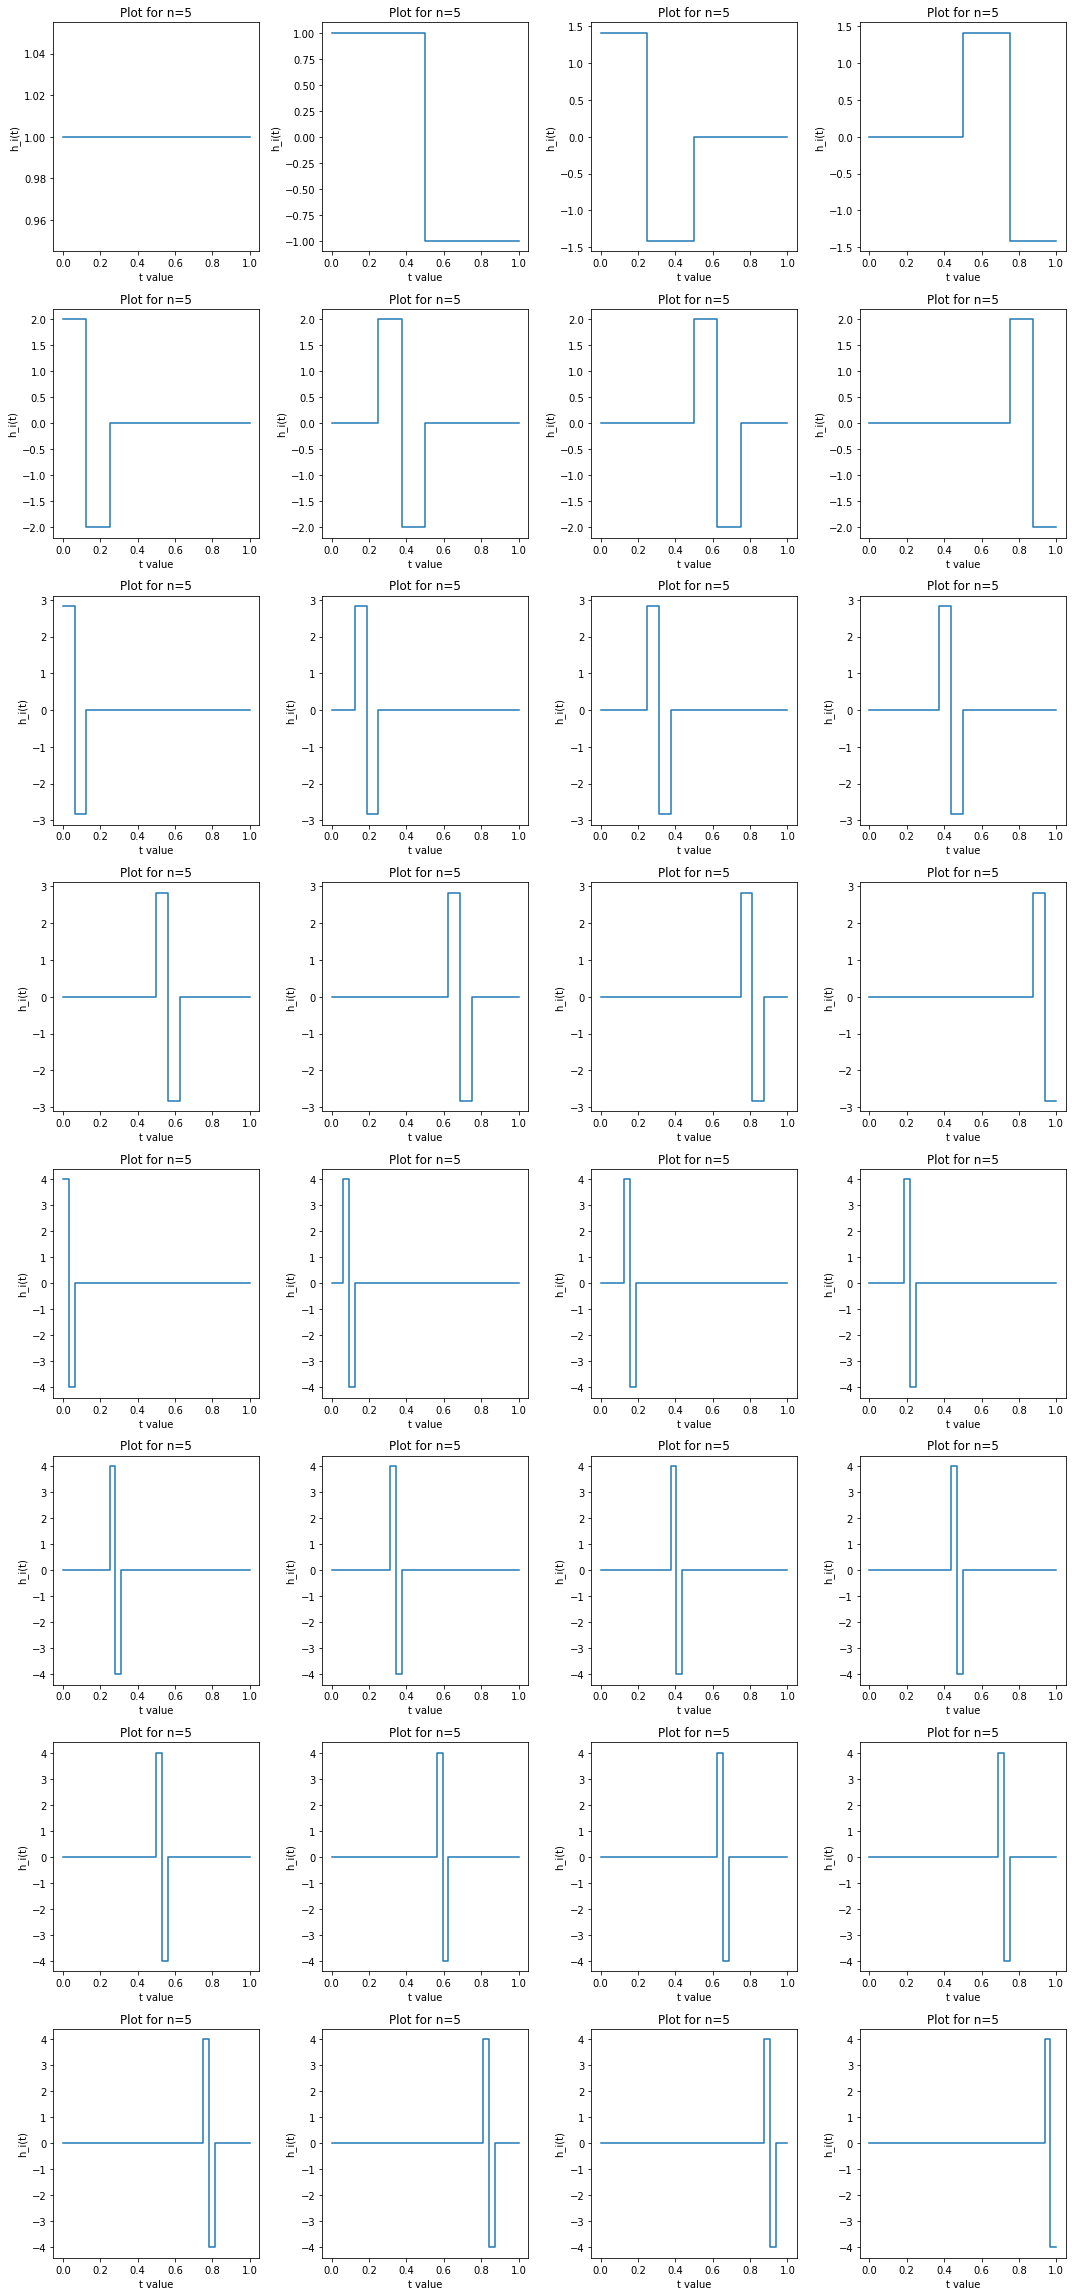

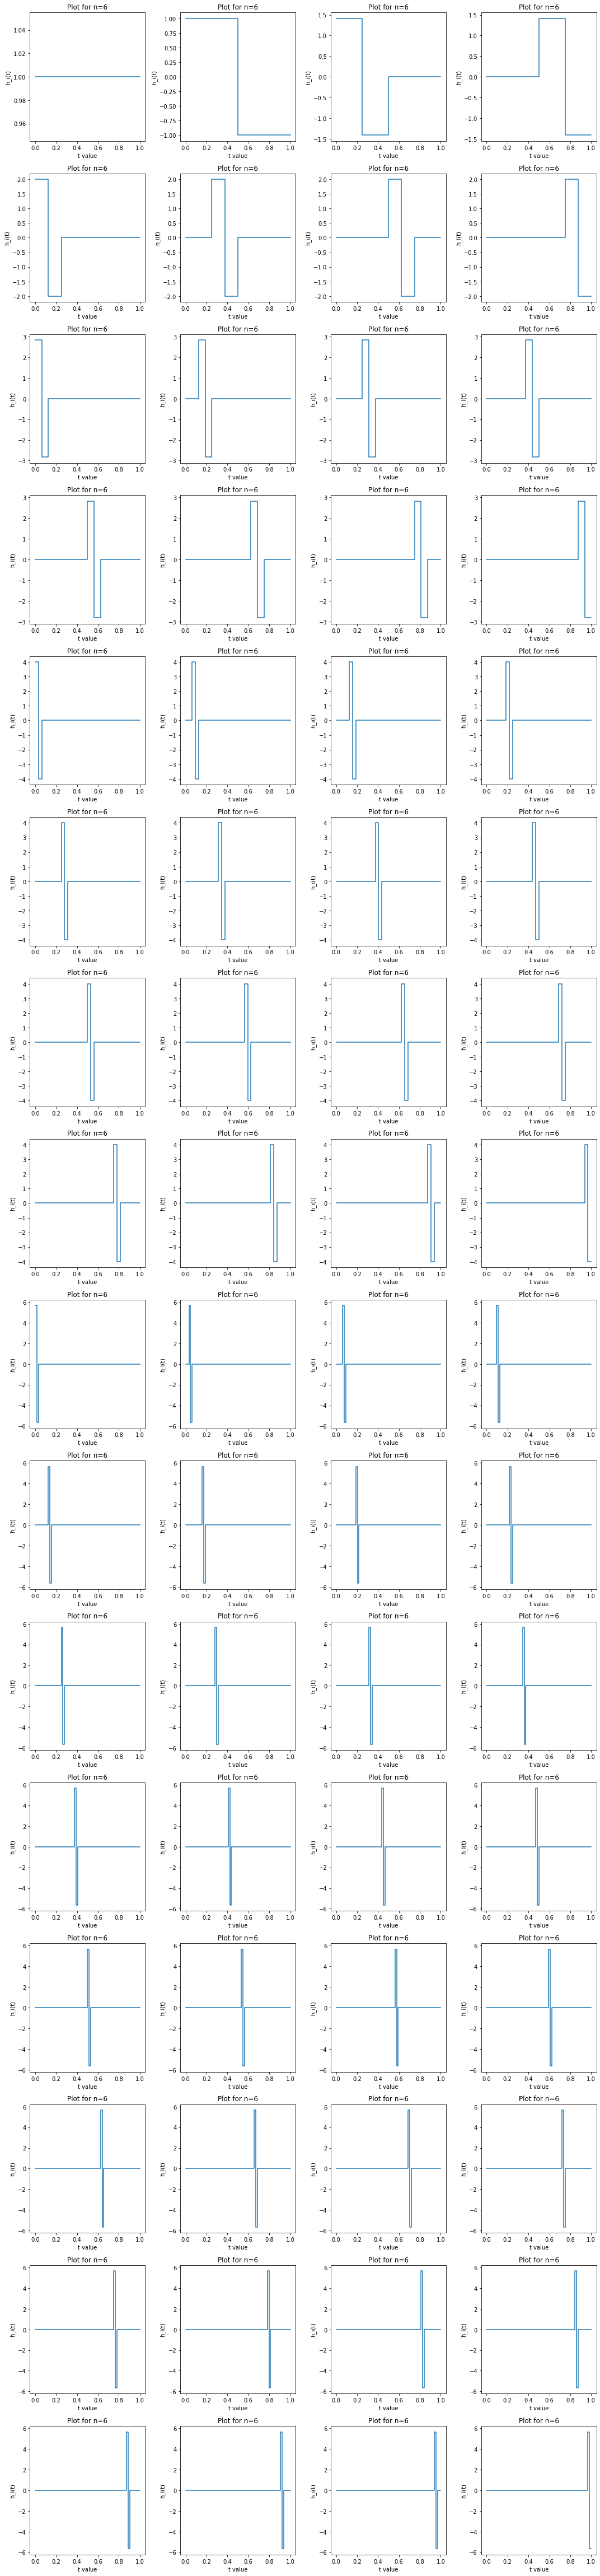

In [ ]:
# plotting the functions
k=0
for n in range (2,7):
    N = np.power(2, n)
    createPlots(k,n,createHaarMatrix,createStandardBasis,createH_I)
    k+=1

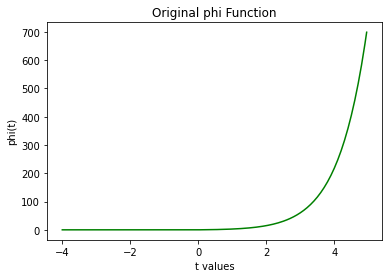

In [ ]:
#Question G - k-term approx implementation
plt.figure()
t = np.arange(-4.0, 5, 0.05)
plt.plot(t, t*np.exp(t), 'g')
plt.xlabel('t values')
plt.ylabel('phi(t)')
plt.title('Original phi Function')
plt.show()

In [ ]:
t_h = 5
t_l = -4
given_k = 4
delta = (t_h - t_l) / given_k
# calculating function energy by integrating its squared term
energy = np.exp(2 * t_h) * (2 * t_h * t_h - 2 * t_h + 1) / 4 - np.exp(2 * t_l) * (2 * t_l * t_l - 2 * t_l + 1) / 4


def printMSE(sum_squared_coeffs, basis_name, k_term):
  MSE = energy - sum_squared_coeffs
  print('MSE in {basis_name} for {k_term}-approx is {result}'.format(basis_name = basis_name,                                                                 k_term = k_term, result = MSE))

def calculate_coeffs(vec_basis):
  coeffs_vec = []
  for vec in vec_basis:
    coeff = 0
    for i in range(4):
      low = -4 + i * delta
      high = -4 + (i + 1) * delta
      coeff += vec[i] * (np.exp(high) * (high - 1) - np.exp(low) * (low - 1))
    coeffs_vec.append(coeff)
  return coeffs_vec

def plot_approx_functions(basis, k_term, n, basis_name, coeffs, edge_low_y, edge_high_y):
  N = np.power(2, n)
  num_of_items_in_row = 4
  num_of_items_in_col = ( N // num_of_items_in_row)
  fig, axis = plt. subplots(num_of_items_in_col, num_of_items_in_row, squeeze=False, sharex=True, sharey=True)
  fig.set_figheight(num_of_items_in_col * 3.5)
  fig.set_figwidth(num_of_items_in_row * 4.5)
  for i in range(num_of_items_in_col):
    for j in range(num_of_items_in_row):
      sum_squared_coeffs = 0
      current_approx = [0, 0, 0, 0]
      for k in range(j + 1):
        coeff_index = k_term[k] - 1
        sum_squared_coeffs += np.power(coeffs[coeff_index], 2)
        for l in range(N):
          current_approx[l] += coeffs[coeff_index] * basis[coeff_index][l] 
      current_approx.append(current_approx[3])
      printMSE(sum_squared_coeffs, j + 1, basis_name)
      plt.xlim([-4, 5])
      plt.ylim([edge_low_y, edge_high_y])
      curr_x = np.arange(-4, 5 + delta, delta)
      axis[i,j].step(curr_x, current_approx, where='post', color='r')
      axis[i,j].set_title('{k}-term approx in {basis_name}'.format(k = j + 1, basis_name = basis_name)) 
      axis[i,j].grid()     
      t = np.arange(-4.0, 5, 0.05)
      axis[i,j].plot(t, t * np.exp(t), 'g')
  for x in axis.flat:
    x.set(xlabel = 't values', ylabel = 'phi(t)')


[-0.2575334333633688, -0.23098819390755998, 18.799310955119573, 377.51868707531804]
MSE in 1 for standard basis-approx is 83250.91186720502
MSE in 2 for standard basis-approx is 82897.49777481775
MSE in 3 for standard basis-approx is 82897.44441927201
MSE in 4 for standard basis-approx is 82897.3780958027


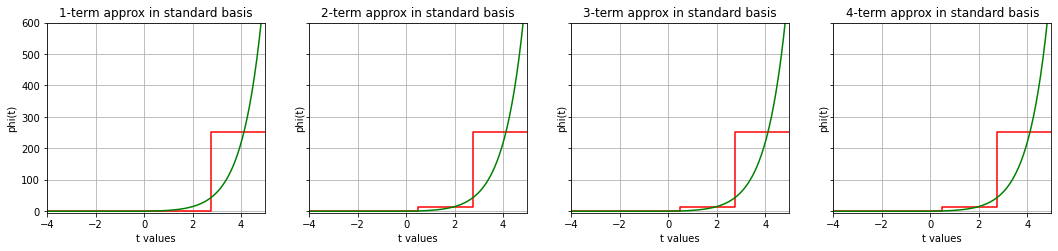

In [13]:
#standard basis
a = 2 / 3 # normalize to given range [-4,5]
std_basis = [[a, 0, 0, 0], [0, a, 0, 0], [0, 0, a, 0], [0, 0, 0, a]]
std_coeffs = calculate_coeffs(std_basis)
print(std_coeffs)
std_k_term = [4, 3, 2, 1]
plot_approx_functions(std_basis, std_k_term, 2, 'standard basis', std_coeffs, -5, 600)

[178.123264381425, -161.43566461184443, -178.56293384596884, 161.4117738963342]
MSE in 1 for Hadamard basis-approx is 193886.54961459708
MSE in 2 for Hadamard basis-approx is 162158.65230070206
MSE in 3 for Hadamard basis-approx is 136097.17849203415
MSE in 4 for Hadamard basis-approx is 110043.41773967282


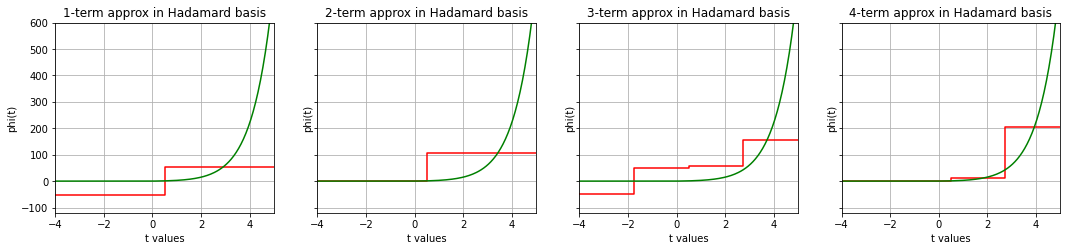

In [ ]:
#hadamard basis
a = 1 / 3 # normalize to given range [-4,5]
hadamard_basis = [[a, a, a, a], [a, -a, a, -a], [a, a, -a, -a], [a, -a, -a, a]]
hadamard_coeffs = calculate_coeffs(hadamard_basis)
print(hadamard_coeffs)
hadamard_k_term = [3, 1, 2, 4]
plot_approx_functions(hadamard_basis, hadamard_k_term, 2, 'Hadamard basis', hadamard_coeffs, -120, 600)

[178.123264381425, -178.56293384596884, 161.4117738963342, -161.43566461184443]
MSE in 1 for WH basis-approx is 193886.54961459708
MSE in 2 for WH basis-approx is 162158.65230070206
MSE in 3 for WH basis-approx is 136097.17849203415
MSE in 4 for WH basis-approx is 110043.41773967282


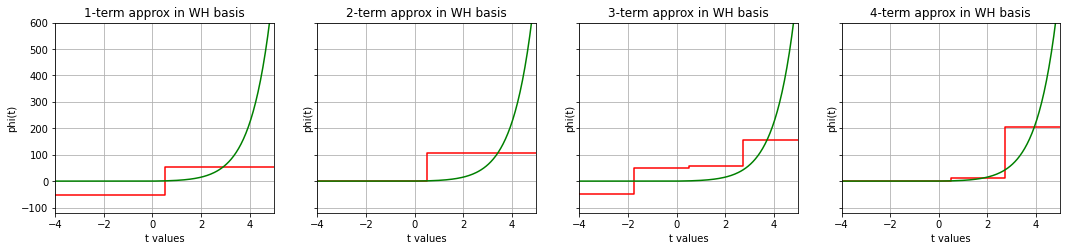

In [ ]:
#walsh-hadamard basis
a = 1 / 3 # normalize to given range [-4,5]
wh_basis = [[a, a, a, a], [a, a, -a, -a], [a, -a, -a, a], [a, -a, a, -a]]
wh_coeffs = calculate_coeffs(wh_basis)
print(wh_coeffs)
wh_k_term = [2, 1, 4, 3]
plot_approx_functions(wh_basis, wh_k_term, 2, 'WH basis', wh_coeffs, -120, 600)

[178.123264381425, -178.56293384596884, -0.01689328694468084, -228.28761305784002]
MSE in 1 for Haar basis-approx is 173656.03668263083
MSE in 2 for Haar basis-approx is 141771.315338951
MSE in 3 for Haar basis-approx is 110043.41802505597
MSE in 4 for Haar basis-approx is 110043.41773967283


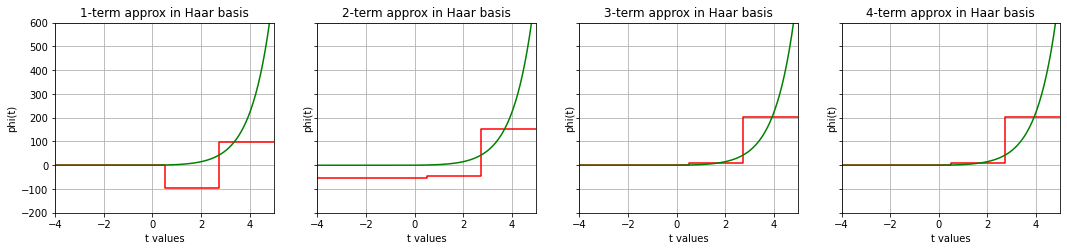

In [ ]:
#haar basis 
a = 1 / 3 # normalize to given range [-4,5]
as2 = a * np.sqrt(2)
haar_basis = [[a, a, a, a], [a, a, -a, -a], [as2, -as2, 0, 0], [0, 0, as2, -as2]]
haar_coeffs = calculate_coeffs(haar_basis)
print(haar_coeffs)
haar_k_term = [4, 2, 1, 3]
plot_approx_functions(haar_basis, haar_k_term, 2, 'Haar basis', haar_coeffs, -200, 600)